In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
#import important libraries

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
#set size and style for plots

df = pd.read_csv('2019.csv')  
df.head()
#load data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
#replace spaces with underscores nk elak errors

In [5]:
#check what columns are available with names for easier graph coding
print(df.columns)

df.info()

Index(['overall_rank', 'country_or_region', 'score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall_rank                  156 non-null    int64  
 1   country_or_region             156 non-null    object 
 2   score                         156 non-null    float64
 3   gdp_per_capita                156 non-null    float64
 4   social_support                156 non-null    float64
 5   healthy_life_expectancy       156 non-null    float64
 6   freedom_to_make_life_choices  156 non-null    float64
 7   generosity                    156 non-null    float64
 8   perceptions_of_corruption     156 non-null    float64
dtypes: floa

In [6]:
#a peek of the datas
df.head()

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
#check data with missing values
print(df.isnull().sum())
#duplicated datas
print("Duplicate rows:", df.duplicated().sum())

overall_rank                    0
country_or_region               0
score                           0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64
Duplicate rows: 0


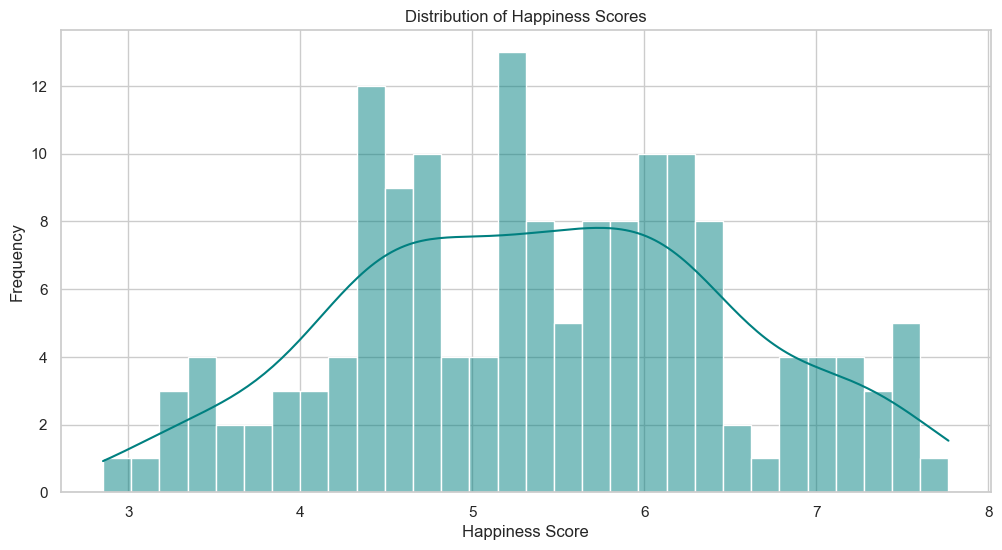

In [8]:
sns.histplot(df['score'], bins=30, kde=True, color='teal')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()
#graph of happiness score distribution

In [11]:
df.to_csv('cleaned_happiness.csv', index=False)
#save cleaned version of data

strealit test

Scatter plot: Score vs Gdp Per Capita


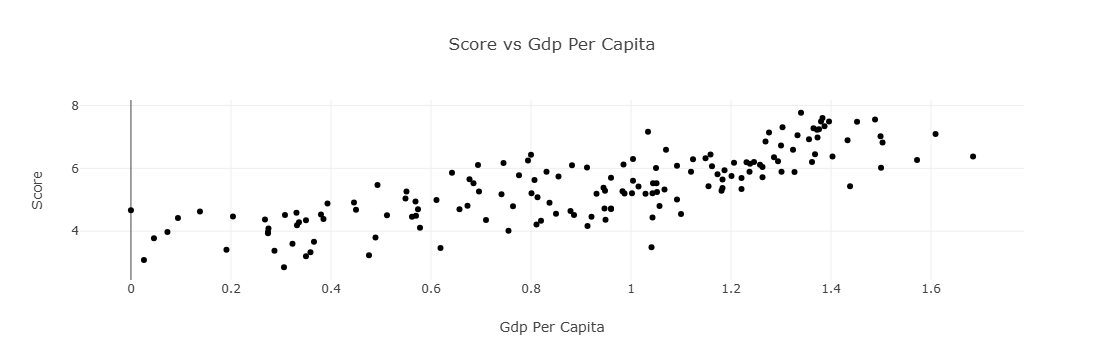


Top 10 Happiest Countries:


,overall_rank,country_or_region,score
0,1,Finland,7.769
1,2,Denmark,7.600
2,3,Norway,7.554
3,4,Iceland,7.494
4,5,Netherlands,7.488
5,6,Switzerland,7.480
6,7,Sweden,7.343
7,8,New Zealand,7.307
8,9,Canada,7.278
9,10,Austria,7.246


In [21]:
import pandas as pd
import plotly.express as px

#load cleaned data
df = pd.read_csv("cleaned_happiness.csv")

#scatter plot
#pilih column for plotting
x_axis = 'gdp_per_capita'
y_axis = 'score'

print(f"Scatter plot: {y_axis.replace('_', ' ').title()} vs {x_axis.replace('_', ' ').title()}")

fig = px.scatter(
    df,
    x=x_axis,
    y=y_axis,
    hover_name='country_or_region',
    title=f"{y_axis.replace('_', ' ').title()} vs {x_axis.replace('_', ' ').title()}",
    labels={x_axis: x_axis.replace('_', ' ').title(), y_axis: y_axis.replace('_', ' ').title()}
)
fig.show()

#ranking table
top_n = 10  #tukar value of n for top nth 
print(f"\nTop {top_n} Happiest Countries:")

top_countries = df.sort_values(by='score', ascending=False).head(top_n)
display(top_countries[['overall_rank', 'country_or_region', 'score']].reset_index(drop=True))
